<a href="https://colab.research.google.com/github/cyflwro/ToleranceStackupMonteCarlo/blob/master/Monte_carlo_V2_uses_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

need to add the following
1. cp calculation
2. plot individual sets with Upper and Lower limits
3. plot sigma lines and mid point based on design limits
4. ability to set design limits for final results to ascertain probability of fouling
5. able to perform the following user work flow
    - specify design limits for each item
    - specify type of distribution for each item
    - if normally distributed, generate distribution from target cpk
    - specify relationship between sets
    - run monte carlo analysis
    - generate individual distribution chart for each input sets of data
    - generate individual distribution chart for monte carlo results 

need to improve the following
1. ability to specify more than 2, preferably 5 sets of distributions 
  --done with class Dim
2. functions are flexible enough to generate between 2-5 sets of data



In [0]:
#def libraries():
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class Dim():
  """ 
  holds a Class of engineering dimensions
  """
  def __init__(self,limit1,limit2,p_mean=False,p_sigma=False,cpk=1.33,stats=False):
    """
    initialises a dimension with its required parameters
      -lowerlimit & upperlimit are Design limits
      -p_mean is process mean
      -p sigma is process sigma
      -cpk to be calculated from limits and process sigma and mean
          -however if process sigma and mean is unknown, then a target cpk should be used
            and it will be used to calculate sigma and mean.
      -if an input is unknown, enter value as False

    limit1 and limit2 will be judge and its value will be used to
          create lowerlimit and upperlimit fields

    also calculates cp as a field.
    in future will add distribution type. for now all distributions are assumed normal.
    """

    if limit1==limit2:
      #error placeholder
      print('limits must not be equal')
    else:
      lowerlimit=min(limit1,limit2)
      upperlimit=max(limit1,limit2)
      self.lowerlimit=lowerlimit
      self.upperlimit=upperlimit
    self.cpk=cpk

    #cases to cover:
    if (lowerlimit and upperlimit)!=False:
      #case 0: input: limits, p_mean, p_sigma, output: calculates cpk <default cpk value will be discarded>
      if (p_mean and p_sigma)!=False:
        self.cpk=Dim.cpk(lowerlimit,upperlimit,p_mean,p_sigma)
        self.p_mean=p_mean
        self.p_sigma=p_sigma

      #1. input: limits, p_mean, cpk, output: p_sigma
      elif (p_mean!=False and p_sigma==False):
        p_sigma=Dim.std_target_if_cpk(cpk,p_mean,lowerlimit,upperlimit)
        self.p_sigma=p_sigma
        self.p_mean=p_mean

      #3. input: limits, cpk, output: p_sigma,p_mean
      elif (cpk !=False) and ((p_sigma and p_mean)==False):
        p_mean=(lowerlimit+upperlimit)/2
        p_sigma=Dim.std_target_if_cpk(cpk,p_mean,lowerlimit,upperlimit)
        self.p_sigma=p_sigma
        self.p_mean=p_mean

      #4. others: error not enough input.
      else:
        pass #placeholder, should output error
    else:
      pass #placeholder, should output error because lowerlimt and upper limts must be known.
    
    self.cp=Dim.cp(lowerlimit,upperlimit,p_sigma)

    #print stats for dimension
    if stats==True:
      Dim.list_dim_field(self)
####-------------------------functions under dimension class----------------------------------------------
  def cpk(lowerlimit,upperlimit,p_mean,p_std):
    """
    cpk(LowerLimit,UpperLimit,p_mean,p_std)
    returns cpk based on design limits, process mean and process standard deviation
    """
    cpl=(p_mean-lowerlimit)/(3*p_std)
    cpu=(upperlimit-p_mean)/(3*p_std)
    cpk=min(cpl,cpu)
    #print('cpk is', round(cpk,2))
    return cpk

  def std_target_if_cpk(cpk_t,p_mean,lowerlimit,upperlimit):
    """
    std_target_if_cpk(cpk_t,p_mean,lowerlimit,upperlimit)

    cpk_t is target Cpk value
    p_mean is process mean 
    lowerlimit is design lower limit
    upperlimit is design upper limit
    
    Gives the std deviation for a target cpk value
    this assumes 
    - standard deviation both sides is calculated, but minimum value is returne
    - process mean must be provided
    """
    target_std_1=(p_mean-lowerlimit)/(3*cpk_t)
    target_std_2=(upperlimit-p_mean)/(3*cpk_t)
    target_std=min(target_std_1,target_std_2)
    return target_std

  def cp(lowerlimit,upperlimit,p_std):
    """
    Calculates Cp, process capability.
    inputs are design lower and upper limits and standard deviation
    """
    cp_set=(upperlimit-lowerlimit)/(6*p_std)
    #print('Cp value is ',round(cp_set,2))
    return cp_set

  def list_dim_field(dim_x):
    heading=['Heading','LSL','USL','P_Mean','P_Std_Dev','Cpk','Cp']
    list_x=['Values',dim_x.lowerlimit,dim_x.upperlimit,dim_x.p_mean,
            round(dim_x.p_sigma,2),round(dim_x.cpk,2),round(dim_x.cp,2)]

    for i,j in enumerate(heading):
      print(heading[i],":",list_x[i])

  def gen_dim_set(set_x,sample_size,distro_type='normal',commentary=False):
    """
    a 'Class' based version of "gen_normal_set" function
    gen_dim_set(set_x,sample_size)
    set_x is expected to be a class Dim instance
    
    distro_type is distribution type, only works with 'normal' in this version.
    
    needs numpy library to work.

    generates a normally distributed set of array given the mean, standard devitaion and sample size
    also performs a check if the standard deviation and mean are followed
    """
    a_process=np.random.normal(set_x.p_mean,set_x.p_sigma,sample_size)
    
    if commentary==True:
      print('standard deviation check,', (np.std(a_process)<set_x.p_sigma))
      print('mean check,', (np.mean(a_process)-set_x.p_mean)<set_x.p_sigma)
    return a_process

In [0]:
def gen_normal_set(p_mean,p_sigma,sample_size):
  """
  gen_normal_set(p_mean,p_sigma,sample_size)
  generates a normally distributed set of array given the mean, standard devitaion and sample size
  also performs a check if the standard deviation and mean are followed
  """
  a_process=np.random.normal(p_mean,p_sigma,sample_size)
  print('standard deviation check,', (np.std(a_process)<p_sigma))
  print('mean check,', (np.mean(a_process)-p_mean)<p_sigma)
  return a_process

In [0]:
def hist_plot(lowerlimit,upperlimit,set_x,bin_size=20):
  """
  v
  plots a normal distribution
    againsts, 
      -normal disitrbution line
      -design limits
  
  """
  set_std=np.std(set_x)
  set_mean=np.mean(set_x)
  
  count,bins,ignored=plt.hist(set_x,bin_size,density=True)
  plt.axvline(set_mean, color='r',ls='--')
  plt.plot(bins, 1/(set_std * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - set_mean)**2 / (2 * set_std**2) ),
         linewidth=2, color='r')



  plt.axvline(lowerlimit, color='g')
  plt.axvline(upperlimit, color='g') 
  plt.axvline((upperlimit+lowerlimit)/2,color='g',ls='--')
  plt.show


In [0]:
#calculates percentage of results population that are within 1 standard dev
def pop_in_sigma(set,times_sigma=1):
  """
  pop_in_sigma(set,times_sigma=1)
  calculates percentage of results population that are within x (default is 1) standard deviation
  """
  limits=[np.mean(set)-(times_sigma*np.std(set)),np.mean(set)+(times_sigma*np.std(set))]
  counts=[0,0] #[within sigma,percentage]
  for res in set:
    if limits[0]<=res<=limits[1]:
      counts[0]+=1
    else:
      pass
  set_l=len(set)
  counts[1]=round((counts[0]/set_l)*100,2)
  print(("{:,}".format(counts[1])),'% of population is within standard deviation')
  print('out of sigma count=',("{:,}".format(set_l-counts[0])), 'of total population',("{:,}".format(set_l)))

In [0]:
def pop_in_design_limits(set,lowerlimit,upperlimit):
  """
  Calculates the percentage of population within design limits
  """
  stdev=np.std(set)
  counts=[0,0] #[within limits,percentage]
  for res in set:
    if lowerlimit<=res<=upperlimit:
      counts[0]+=1
    else:
      pass
  set_l=len(set)
  counts[1]=round((counts[0]/set_l)*100,2)
  print(("{:,}".format(counts[1])),'% of population is within design limits')
  print('out of spec count=',("{:,}".format(set_l-counts[0])), 'of total population',("{:,}".format(set_l)))

In [0]:
#use this cell to setup dimensions & run for results
#example will use 3 sets of dimensions
#limit1,limit2,p_mean=False,p_sigma=False,cpk=1.33,stats=False
#dimension 'a'
dim_a=Dim(9.75,10.25,p_mean=10,p_sigma=0.06)

#dimension 'b'
dim_b=Dim(2.5,3,p_mean=2.76,cpk=1.23)

#dimension 'c'
dim_c=Dim(3.3,3.45,p_mean=3.375,p_sigma=0.05)

#limits for final results, used in final plot
res_dim=Dim(8.8,9.8)

#define results and Monte Carlo Runs
#histogram bin quantity 
hist_bins=50

sample_size=150000 #for input distributions
mon_carlo_runs=10000

#generate test population
set_a=Dim.gen_dim_set(dim_a,sample_size)
set_b=Dim.gen_dim_set(dim_b,sample_size)
set_c=Dim.gen_dim_set(dim_c,sample_size)


#generate monte carlo results
result_set=[]
i=0
while i<mon_carlo_runs:
  #a+b-c = result
  result_set.append(rd.choice(set_a)+rd.choice(set_b)-rd.choice(set_c))
  i+=1
result_mean=np.mean(result_set)
result_sigma=np.std(result_set)
print('result mean', result_mean)
print('result sigma',result_sigma)

result mean 9.384715487064502
result sigma 0.10051693408459277


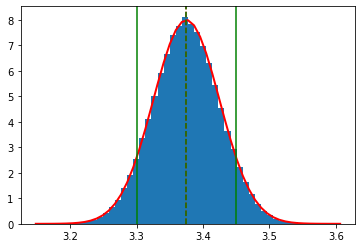

In [0]:
#plots
#plot histograms of input populations
#hist_plot(dim_a.lowerlimit,dim_a.upperlimit,set_a,bin_size=hist_bins)
#hist_plot(dim_b.lowerlimit,dim_b.upperlimit,set_b,bin_size=hist_bins)
hist_plot(dim_c.lowerlimit,dim_c.upperlimit,set_c,bin_size=hist_bins)

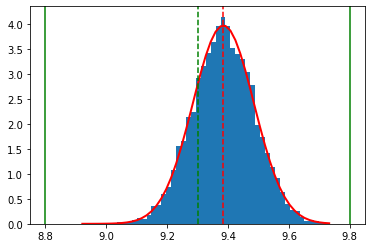

In [0]:
#plots
#plot results
hist_plot(res_dim.lowerlimit,res_dim.upperlimit,result_set,bin_size=hist_bins)

In [0]:
#worst case for monte carlo analysis
print('Monte Carlo Analysis')
print('min = ',round(min(result_set),2))
print('Max = ',round(max(result_set),2))
print('Mean = ',round(np.mean(result_set),2))
print('Std dev = ',round(np.std(result_set),2))


Monte Carlo Analysis
min =  9.03
Max =  9.8
Mean =  9.38
Std dev =  0.1


In [0]:
pop_in_sigma(set_a,1)
pop_in_design_limits(set_a,dim_a.lowerlimit,dim_a.upperlimit)
pop_in_sigma(set_b,1)
pop_in_design_limits(set_b,dim_b.lowerlimit,dim_b.upperlimit)
pop_in_sigma(set_c,1)
pop_in_design_limits(set_c,dim_c.lowerlimit,dim_c.upperlimit)
pop_in_sigma(result_set,1)
pop_in_design_limits(result_set,res_dim.lowerlimit,res_dim.upperlimit)

68.42 % of population is within standard deviation
out of sigma count= 47,377 of total population 150,000
100.0 % of population is within design limits
out of spec count= 6 of total population 150,000
68.34 % of population is within standard deviation
out of sigma count= 47,484 of total population 150,000
99.98 % of population is within design limits
out of spec count= 33 of total population 150,000
68.29 % of population is within standard deviation
out of sigma count= 47,561 of total population 150,000
86.61 % of population is within design limits
out of spec count= 20,089 of total population 150,000
68.1 % of population is within standard deviation
out of sigma count= 3,190 of total population 10,000
100.0 % of population is within design limits
out of spec count= 0 of total population 10,000


24.02.2020 
progress to this point, below which contains older codes.
older codes only work assuming A+B


In [0]:
#worst case analysis, for set_a + set_b
#worst_case for set_a
wst_a_h=p_mean+p_sigma
wst_a_l=p_mean-p_sigma
wst_a=[round(wst_a_l,2),round(wst_a_h,2)]
#worst_case for set_b
wst_b_h=p_mean_2+p_sigma_2
wst_b_l=p_mean_2-p_sigma_2
wst_b=[round(wst_b_l,2),round(wst_b_h,2)]

#worst case when a+b
wst_r=[max(wst_a)+max(wst_b),min(wst_a)+min(wst_b)]

#norminal
nom_r=p_mean+p_mean_2

print('Worst Case Analysis')
print('min = ',wst_r[1])
print('Max = ',wst_r[0])
print('Nominal = ',nom_r)


Worst Case Analysis
min =  12.59
Max =  12.81
Nominal =  12.7
